# Census Data Exploration
Ben Bressette

I am using this assignment opportunity to rework some of the things in this file that didn't work properly and I didn't have the patience to fix :)

Namely, I am going to narrow it down to one dataset, and then actually go through and clean the data (that is, rename the columns). 

--

Our group project is a comparison of accessibility and mobility in Los Angeles neighborhoods. We seek to grasp how different neighborhoods and demographic compositions experience daily life in their own neighborhood and the broader city. We will be using data from the American Community Survey, LA Metro, the City of LA, LA Times, and the Bureau of Transportation Statistics.

My partner, Andrew Williams, looked at a variety of data that explores the means of transportation to work at the census tract level. I will analyze race, income, and density at the same level across the City of LA. 

## Preparing data libraries

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

This step is directly from the class lab, and will allow us to properly analyze and visualize our data.

## Load Census data

I will load one Census data table:

Table B03002: Hispanic or Latino Origin by Race

In [2]:
# loading the three data files

gdf_race = gpd.read_file('data/acs2019_5yr_B03002_raceethnicity.geojson')

## Begin to look at the data
Since there are three different datasets, we will need to run commands for each one. 

In [3]:
gdf_race.shape

(1005, 45)

In [4]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002010',
 'B03002011',
 'B03002012',
 'B03002013',
 'B03002014',
 'B03002015',
 'B03002016',
 'B03002017',
 'B03002018',
 'B03002019',
 'B03002020',
 'B03002021',
 'geometry']

In [5]:
# redefine gdf with only columns to keep
gdf_race = gdf_race[columns_to_keep]

In [6]:
# check the slimmed down gdf
gdf_race.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,...,B03002013,B03002014,B03002015,B03002016,B03002017,B03002018,B03002019,B03002020,B03002021,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,731.0,0.0,0.0,0.0,0.0,383.0,74.0,34.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,99.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,1661.0,0.0,0.0,0.0,0.0,874.0,81.0,48.0,33.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,822.0,0.0,0.0,0.0,0.0,497.0,45.0,11.0,34.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,224.0,0.0,0.0,0.0,0.0,45.0,28.0,28.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [7]:
gdf_race.columns = ['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'geometry']

In [8]:
gdf_race.head()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,H_White,H_Black,H_Native,H_Asian,H_Native Hawaiian,H_Some other race alone,H_Two or more races,H_Two races including some other race,"H_Two races excluding some other race, and three or more races",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,731.0,0.0,0.0,0.0,0.0,383.0,74.0,34.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,99.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,1661.0,0.0,0.0,0.0,0.0,874.0,81.0,48.0,33.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,822.0,0.0,0.0,0.0,0.0,497.0,45.0,11.0,34.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,224.0,0.0,0.0,0.0,0.0,45.0,28.0,28.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [9]:
gdf_race['N_WhitePercentage']=round(((gdf_race['N_White']/ gdf_race['Total'])*100),2)
gdf_race['N_BlacPercentage']=round(((gdf_race['N_Black']/ gdf_race['Total'])*100),2)
gdf_race['N_NativePercentage']=round(((gdf_race['N_Native']/ gdf_race['Total'])*100),2)
gdf_race['N_AsianPercentage']=round(((gdf_race['N_Asian']/ gdf_race['Total'])*100),2)
gdf_race['N_HawaiianPercentage']=round(((gdf_race['N_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['N_OtherPercentage']=round(((gdf_race['N_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusPercentage']=round(((gdf_race['N_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoInclOtherPercentage']=round(((gdf_race['N_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusThreePlusPercentage']=round(((gdf_race['N_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)

gdf_race['H_WhitePercentage']=round(((gdf_race['H_White']/ gdf_race['Total'])*100),2)
gdf_race['H_BlacPercentage']=round(((gdf_race['H_Black']/ gdf_race['Total'])*100),2)
gdf_race['H_NativePercentage']=round(((gdf_race['H_Native']/ gdf_race['Total'])*100),2)
gdf_race['H_AsianPercentage']=round(((gdf_race['H_Asian']/ gdf_race['Total'])*100),2)
gdf_race['H_HawaiianPercentage']=round(((gdf_race['H_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['H_OtherPercentage']=round(((gdf_race['H_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusPercentage']=round(((gdf_race['H_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoInclOtherPercentage']=round(((gdf_race['H_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusThreePlusPercentage']=round(((gdf_race['H_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)


gdf_race.head()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,2.69,17.07,0.0,0.0,0.0,0.0,8.94,1.73,0.79,0.93
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,1.97,2.91,0.0,0.0,0.0,0.0,1.41,0.00,0.00,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,0.22,26.17,0.0,0.0,0.0,0.0,13.77,1.28,0.76,0.52
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,2.65,22.20,0.0,0.0,0.0,0.0,13.43,1.22,0.30,0.92
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,1.60,5.77,0.0,0.0,0.0,0.0,1.16,0.72,0.72,0.00


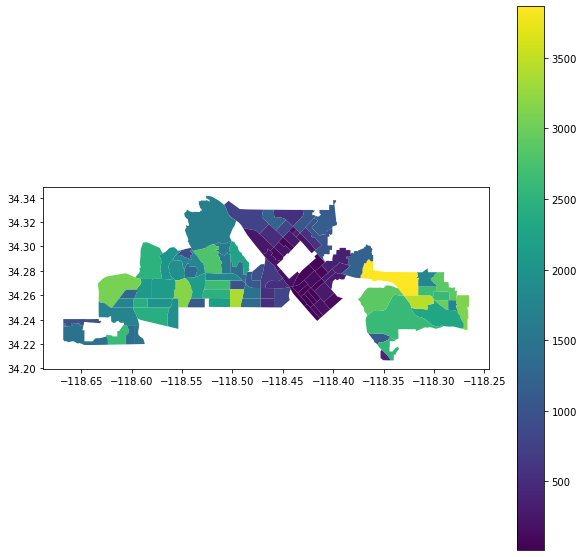

In [10]:
gdf_race.head(100).plot(figsize=(10,10),column='N_White',legend=True)

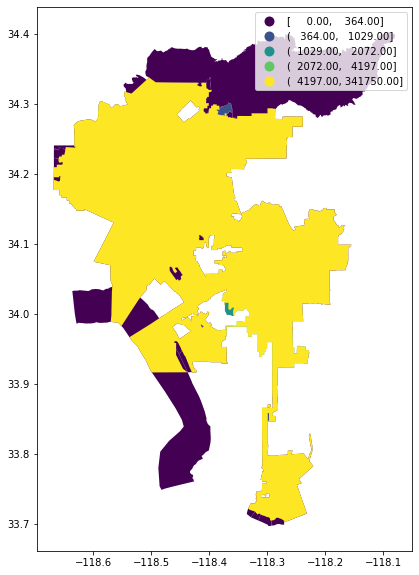

In [11]:
gdf_race.plot(figsize=(12,10),
                 column='N_Black',
                 legend=True, 
                 scheme='NaturalBreaks')

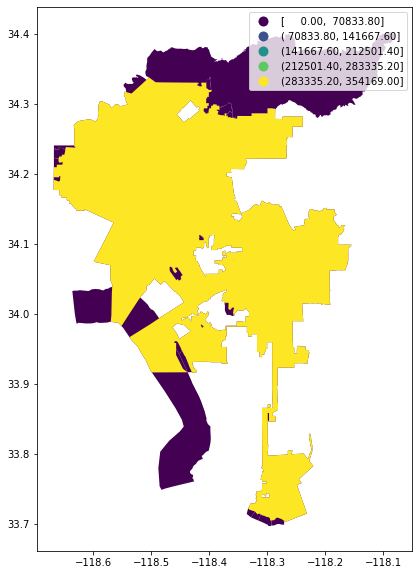

In [29]:
gdf_race.plot(figsize=(12,10),
                 column='Black',
                 legend=True, 
                 scheme='equal_interval')

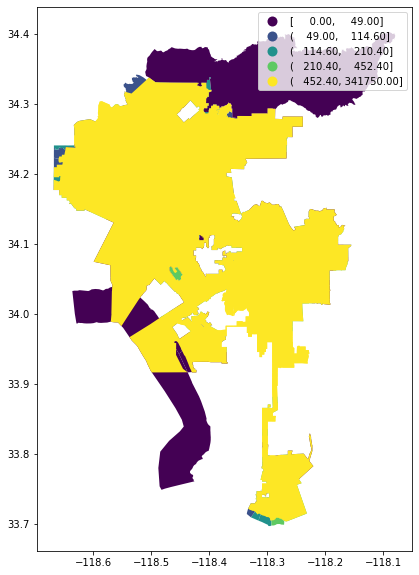

In [12]:
gdf_race.plot(figsize=(12,10),
                 column='N_Black',
                 legend=True, 
                 scheme='quantiles')

Text(0.5, 1.0, 'N_White')

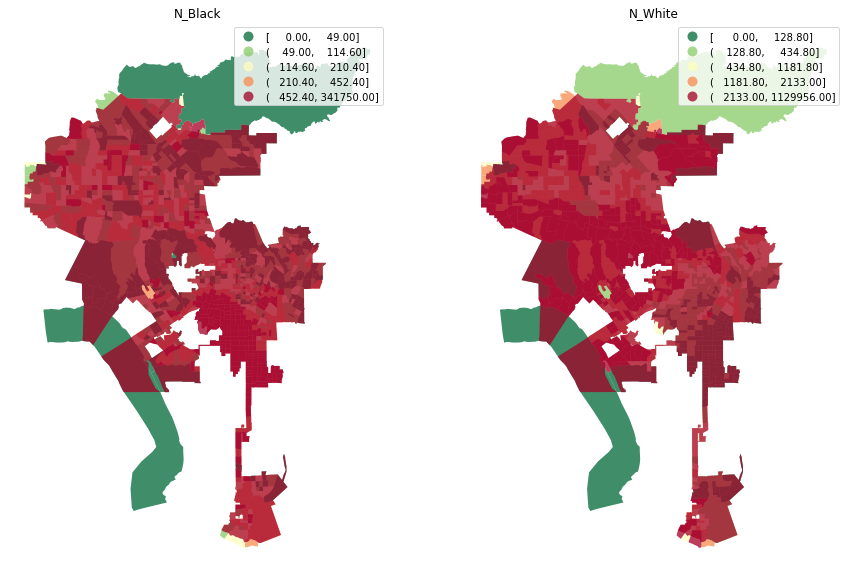

In [13]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_race.plot(column='N_Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("N_Black")

# spatial lag map on the right
gdf_race.plot(column='N_White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("N_White")

In [14]:
gdf_race

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,2.69,17.07,0.00,0.00,0.00,0.00,8.94,1.73,0.79,0.93
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,1.97,2.91,0.00,0.00,0.00,0.00,1.41,0.00,0.00,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,0.22,26.17,0.00,0.00,0.00,0.00,13.77,1.28,0.76,0.52
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,2.65,22.20,0.00,0.00,0.00,0.00,13.43,1.22,0.30,0.92
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,1.60,5.77,0.00,0.00,0.00,0.00,1.16,0.72,0.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,19.0,7.0,11.0,0.0,0.0,0.0,0.0,...,3.85,11.54,0.00,0.00,0.00,0.00,15.38,0.00,0.00,0.00
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,788.0,393.0,232.0,26.0,36.0,24.0,25.0,...,2.38,20.68,1.19,0.94,1.19,0.00,6.21,2.72,2.30,0.43
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What does this tell us? 
Not a lot -- so far. The maps produced for the race and language are the same, and the data table for geographic mobility is just what we saw when we downloaded the data from the Census. This is ok though -- not all data is going to be conclusive on its own, and we will need to combine sets, tables, and variables to reach meaningful relationships.

In [15]:
gdf_race.geoid.head()

0    14000US06037101110
1    14000US06037101122
2    14000US06037101210
3    14000US06037101220
4    14000US06037101300
Name: geoid, dtype: object

Again, this doesn't tell us much. It's just the geographic IDs of the observations in the Census, which are the same. 

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
gdf_race.sample()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,N_Two or more races,N_Two races including some other race,"N_Two races excluding some other race, and three or more races",Hispanic or Latino,H_White,H_Black,H_Native,H_Asian,H_Native Hawaiian,H_Some other race alone,H_Two or more races,H_Two races including some other race,"H_Two races excluding some other race, and three or more races",geometry,N_WhitePercentage,N_BlacPercentage,N_NativePercentage,N_AsianPercentage,N_HawaiianPercentage,N_OtherPercentage,N_TwoPlusPercentage,N_TwoInclOtherPercentage,N_TwoPlusThreePlusPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
84,14000US06037111400,"Census Tract 1114, Los Angeles, CA",8735.0,5011.0,3376.0,390.0,0.0,1227.0,0.0,18.0,0.0,0.0,0.0,3724.0,2206.0,0.0,94.0,33.0,0.0,1239.0,152.0,112.0,40.0,"MULTIPOLYGON (((-118.50240 34.25117, -118.5023...",38.65,4.46,0.0,14.05,0.0,0.21,0.0,0.0,0.0,25.25,0.0,1.08,0.38,0.0,14.18,1.74,1.28,0.46


In [18]:
gdf_race.info

<bound method DataFrame.info of                    geoid                                   name      Total  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     4283.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     3405.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     6347.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3702.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA     3884.0   
5     14000US06037101400     Census Tract 1014, Los Angeles, CA     3458.0   
6     14000US06037102103  Census Tract 1021.03, Los Angeles, CA     1763.0   
7     14000US06037102104  Census Tract 1021.04, Los Angeles, CA     3721.0   
8     14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1905.0   
9     14000US06037102107  Census Tract 1021.07, Los Angeles, CA     4349.0   
10    14000US06037103101  Census Tract 1031.01, Los Angeles, CA     2428.0   
11    14000US06037103102  Census